## RUN THIS CELL FOR A WHILE AND CLOSE IT

In [1]:
from main_game_class import Flappy_Main
from PIL import Image , ImageOps
import os
import random
import time

if 'game_frames' not in os.listdir():
    os.makedirs('game_frames')

def save_as_img(arr, name1 , name2):
    im = Image.fromarray(arr).rotate(-90)
    im = ImageOps.mirror(im)
    im.save("./game_frames/frame_{}_{}.jpeg".format(name1 , name2))


env = Flappy_Main(play_human=False, display_screen=True, state_vec = False)
## this is where pygame begins
# env.init()


state = env.get_screen_rbg()
## play for 200 frames

game_no = 0
for i in range(5):
    game_no += 1
    print('Starting New game ...')
    tot_rew = 0
    for i in range(2000):
        action = random.choice([0,1,2])
        next_state, reward, done = env.step( action )

        if i % 10 == 0 :
            save_as_img(next_state, game_no , i )

        tot_rew += reward if reward is not None else 0
        if done:
            print('Good reward : ', tot_rew )
            break

env.close()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Starting New game ...


SystemExit: 

/home/fm-pc-lt-151/anaconda3/envs/atlas/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
import matplotlib.pyplot as plt
import numpy as np

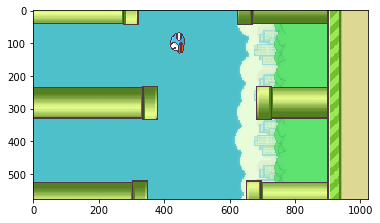

In [3]:
plt.imshow( next_state )

In [4]:
from skimage.transform import resize
from skimage.color import rgb2gray
def preprocess( rgb ):
    rgb = np.fliplr( np.rot90( rgb , -1) )
    rgb = rgb2gray( rgb )
#     rgb =  np.dot(rgb[...,:3], [0.299, 0.587, 0.144])[:900, :] / 255
    return resize( rgb , ( 64 , 64 ) )

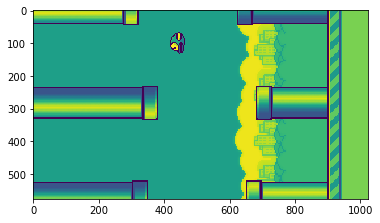

In [5]:
plt.imshow(rgb2gray( next_state ))

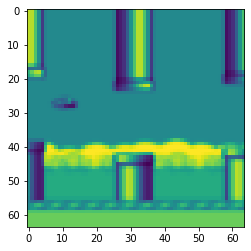

In [6]:
process = preprocess( next_state )
plt.imshow( process )

In [7]:
## TESTING ONLY
# from model import QNetwork as Net
# import torch
# a = Net( action_size= 3 )
# out = a.forward( torch.as_tensor( process[np.newaxis, np.newaxis ,:,:]).float() )

In [8]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from agent import Agent
agent = Agent( action_size=3 , seed = 23 )

In [10]:
# %%timeit
# env = Flappy_Main(play_human=False, display_screen=True)
# state = env.get_screen_rbg()

# game_no = 0
# for i in range(5):
#     game_no += 1
#     print('Starting New game ...' , i)
#     tot_rew = 0
#     for i in range(2000):
#         action = agent.act( preprocess(state) )
#         next_state, reward, active = env.step( action , eps = 0.5 )

#         tot_rew += reward if reward is not None else 0
#         if not active:
#             print('Good reward : ', tot_rew )
#             break
        
#         state = next_state

# env.close()

## OUR AGENT PLAYING THE FREAKING GAME

In [11]:
env = Flappy_Main(play_human=False, display_screen=True)
state = env.get_screen_rbg()

game_no = 0
for i in range(1):
    game_no += 1
    print('Starting New game ...' , i)
    tot_rew = 0
    for i in range(2000):
        action = agent.act( preprocess(state) )
        next_state, reward, done = env.step( action )
        

#         if i % 10 == 0 :
#             save_as_img(next_state, game_no , i )

        tot_rew += reward if reward is not None else 0
        if done:
            print('Good reward : ', tot_rew )
            break
        
        state = next_state

env.close()

Starting New game ... 0


SystemExit: 

/home/fm-pc-lt-151/anaconda3/envs/atlas/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## TRAINING OUR AGENT TO BE BETTER

In [11]:
def dqn(state, n_episodes=20000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.9999999):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = preprocess(state)
        score = 0
        for t in range(max_t):
            action = agent.act( state , eps)
            next_state, reward, done = env.step(action)
            
            
            if done:
                break 
            else:
                
                next_state = preprocess( next_state )
                
                reward *= 0.0001
                score += reward
                agent.step(state, action, reward, next_state, done)
                state = next_state
                
            
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f} \n'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f} \n'.format(i_episode, np.mean(scores_window)))
#         if np.mean(scores_window)>=200.0:
#             print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
#             torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
#             break
    
    print('CLOSING THE BIRD ENVIRONMENT ')
    env.close()
    return scores

In [12]:
# env = Flappy_Main(play_human=False, display_screen=False)
# state = env.get_screen_rbg()
# scores = dqn(state)

In [ ]:
try:
    env = Flappy_Main( play_human=False , display_screen=False )
    state = env.get_screen_rbg()
    scores = dqn(state)
except Exception as e:
    print(e)
    env.close()

Episode 1	Average Score: 0.54 
Episode 2	Average Score: 0.54 
Episode 3	Average Score: 0.54 
Episode 4	Average Score: 1.00 
Episode 5	Average Score: 0.91 
Episode 6	Average Score: 0.98 
Episode 7	Average Score: 1.02 
LOSS IS  0.01168691273778677
Episode 8	Average Score: 1.06 
Episode 9	Average Score: 1.00 
Episode 10	Average Score: 1.03 
Episode 11	Average Score: 0.99 
Episode 12	Average Score: 1.01 
Episode 13	Average Score: 1.22 
LOSS IS  0.00671176053583622
Episode 14	Average Score: 1.17 
Episode 15	Average Score: 1.14 
Episode 16	Average Score: 1.26 
Episode 17	Average Score: 1.22 
Episode 18	Average Score: 1.18 
Episode 19	Average Score: 1.25 
Episode 20	Average Score: 1.21 
LOSS IS  0.0032638111151754856
Episode 21	Average Score: 1.18 
Episode 22	Average Score: 1.15 
Episode 23	Average Score: 1.13 
Episode 24	Average Score: 1.18 
Episode 25	Average Score: 1.19 
Episode 26	Average Score: 1.19 
Episode 27	Average Score: 1.17 
Episode 28	Average Score: 1.15 
LOSS IS  0.0011338333133

Episode 221	Average Score: 1.46 
Episode 222	Average Score: 1.45 
Episode 223	Average Score: 1.44 
Episode 224	Average Score: 1.44 
Episode 225	Average Score: 1.43 
Episode 226	Average Score: 1.44 
Episode 227	Average Score: 1.44 
LOSS IS  0.0025576786138117313
Episode 228	Average Score: 1.44 
Episode 229	Average Score: 1.44 
Episode 230	Average Score: 1.44 
Episode 231	Average Score: 1.43 
Episode 232	Average Score: 1.45 
Episode 233	Average Score: 1.45 
LOSS IS  0.003281052689999342
Episode 234	Average Score: 1.49 
Episode 235	Average Score: 1.48 
Episode 236	Average Score: 1.51 
Episode 237	Average Score: 1.51 
Episode 238	Average Score: 1.51 
Episode 239	Average Score: 1.52 
LOSS IS  0.004978984594345093
Episode 240	Average Score: 1.52 
Episode 241	Average Score: 1.49 
Episode 242	Average Score: 1.50 
Episode 243	Average Score: 1.51 
Episode 244	Average Score: 1.51 
Episode 245	Average Score: 1.51 
Episode 246	Average Score: 1.51 
LOSS IS  0.006572023034095764
Episode 247	Average S

Episode 439	Average Score: 1.31 
Episode 440	Average Score: 1.32 
Episode 441	Average Score: 1.32 
Episode 442	Average Score: 1.32 
LOSS IS  3.6530902434606105e-05
Episode 443	Average Score: 1.32 
Episode 444	Average Score: 1.30 
Episode 445	Average Score: 1.31 
Episode 446	Average Score: 1.38 
LOSS IS  2.25442236114759e-05
Episode 447	Average Score: 1.38 
Episode 448	Average Score: 1.39 
Episode 449	Average Score: 1.39 
Episode 450	Average Score: 1.43 
Episode 451	Average Score: 1.43 
Episode 452	Average Score: 1.42 
LOSS IS  2.0716204744530842e-05
Episode 453	Average Score: 1.44 
Episode 454	Average Score: 1.43 
Episode 455	Average Score: 1.42 
Episode 456	Average Score: 1.42 
Episode 457	Average Score: 1.41 
Episode 458	Average Score: 1.41 
Episode 459	Average Score: 1.40 
Episode 460	Average Score: 1.40 
LOSS IS  1.4332003047456965e-05
Episode 461	Average Score: 1.41 
Episode 462	Average Score: 1.40 
Episode 463	Average Score: 1.40 
Episode 464	Average Score: 1.40 
Episode 465	Aver

Episode 656	Average Score: 1.29 
Episode 657	Average Score: 1.29 
LOSS IS  2.8264072170713916e-05
Episode 658	Average Score: 1.30 
Episode 659	Average Score: 1.30 
Episode 660	Average Score: 1.30 
Episode 661	Average Score: 1.29 
Episode 662	Average Score: 1.29 
Episode 663	Average Score: 1.30 
Episode 664	Average Score: 1.29 
LOSS IS  1.3015351214562543e-05
Episode 665	Average Score: 1.29 
Episode 666	Average Score: 1.30 
Episode 667	Average Score: 1.29 
Episode 668	Average Score: 1.27 
Episode 669	Average Score: 1.33 
Episode 670	Average Score: 1.33 
Episode 671	Average Score: 1.33 
LOSS IS  4.824494681088254e-05
Episode 672	Average Score: 1.33 
Episode 673	Average Score: 1.31 
Episode 674	Average Score: 1.31 
Episode 675	Average Score: 1.32 
Episode 676	Average Score: 1.31 
Episode 677	Average Score: 1.32 
LOSS IS  1.4740918231836986e-05
Episode 678	Average Score: 1.31 
Episode 679	Average Score: 1.31 


In [15]:
env.close()

In [ ]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()